# Segmentación basada en regiones
## Reglas de la actividad de practica a realizar

- Tomar una fotografía de su preferencia y pasarla por el código.
- Buscar las imperfecciones de la region por color y marcarlas.
- Realizar a mano un trazo correcto de segmentación por región.
- Redactar a libre texto la idea profesional de la semilla a utilizar (si son coches
puede ser el nivel de brillo de la pintura y el suavizado de las curvas, etc.).
- Crear un archivo .pdf con los resultados.


*La técnica busca regiones por el criterio de color.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

[[1 1 1 0 1 0 1 0 0 1]
 [0 1 0 0 1 1 1 1 1 1]
 [1 1 0 0 1 1 0 0 0 1]
 [0 1 0 1 1 1 0 1 0 0]
 [1 1 1 0 0 0 1 0 0 1]
 [0 0 1 1 0 1 1 1 1 0]
 [1 1 1 1 1 1 0 1 0 1]
 [1 0 0 0 0 0 1 1 0 0]
 [0 1 1 0 0 1 1 0 0 1]
 [1 0 1 0 0 0 0 1 1 0]]


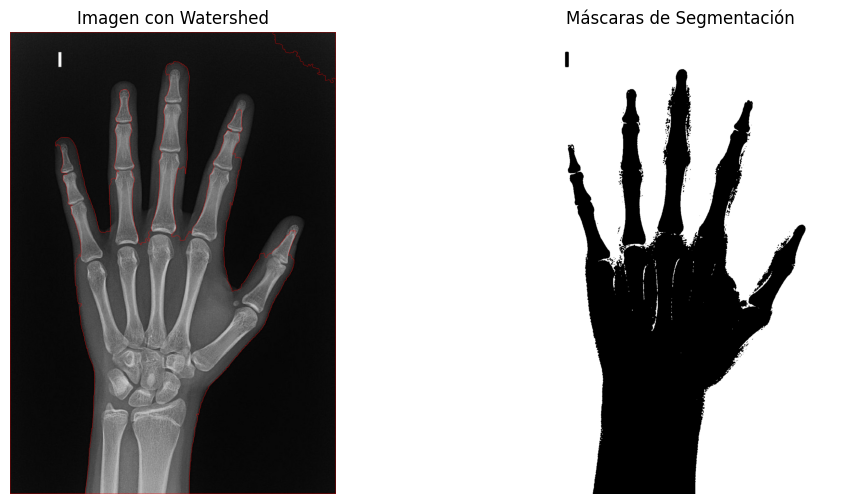

[[1 0 0 0 1 0 1 1 0 1]
 [0 0 0 0 1 1 0 1 0 1]
 [1 0 0 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 0]
 [0 0 1 0 0 0 1 1 1 0]
 [1 1 0 1 1 0 1 0 1 1]
 [1 1 1 0 0 1 0 1 0 1]
 [1 1 0 1 0 1 0 0 1 0]
 [0 1 1 0 0 1 0 0 1 0]
 [1 0 1 0 1 1 1 1 0 0]]


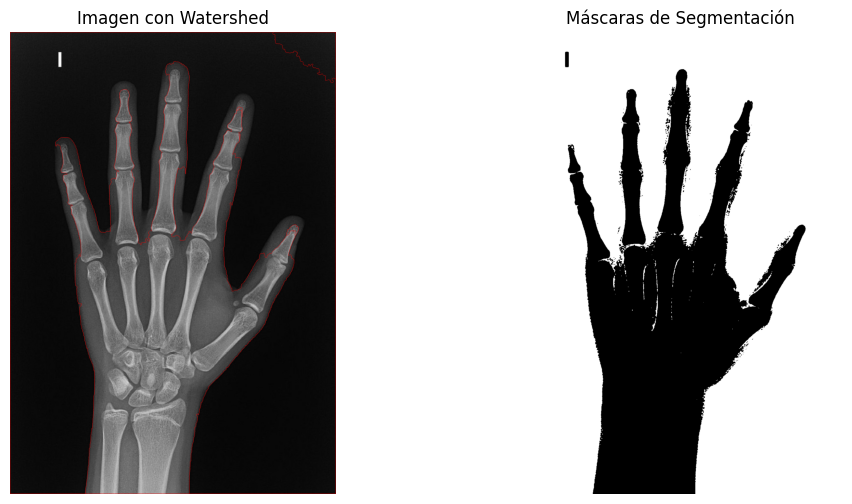

[[0 0 0 0 0 1 0 1 1 1]
 [0 0 1 1 1 0 1 1 1 0]
 [1 0 0 1 1 1 0 0 0 1]
 [1 0 1 0 1 0 1 1 0 0]
 [0 0 0 0 1 1 0 0 0 1]
 [1 0 0 0 1 0 0 1 1 1]
 [0 0 1 1 1 0 1 1 1 0]
 [0 1 0 1 1 0 1 0 0 1]
 [1 0 1 1 0 1 0 1 0 0]
 [1 0 1 0 0 0 0 0 1 0]]


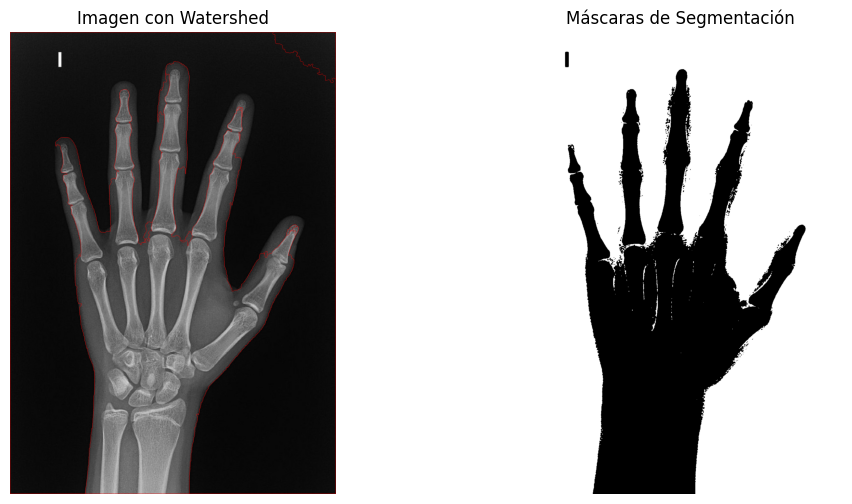

[[0 1 1 1 1 0 1 0 1 1]
 [1 0 1 1 1 0 0 1 1 0]
 [0 0 0 1 0 1 0 1 0 1]
 [1 0 0 0 0 1 1 1 1 0]
 [0 1 1 0 1 1 0 0 1 1]
 [0 1 1 0 0 1 0 1 0 0]
 [0 1 0 0 1 0 1 1 0 0]
 [0 0 1 0 0 1 1 1 1 0]
 [1 1 1 1 0 0 0 1 1 1]
 [1 0 0 1 0 0 1 1 1 1]]


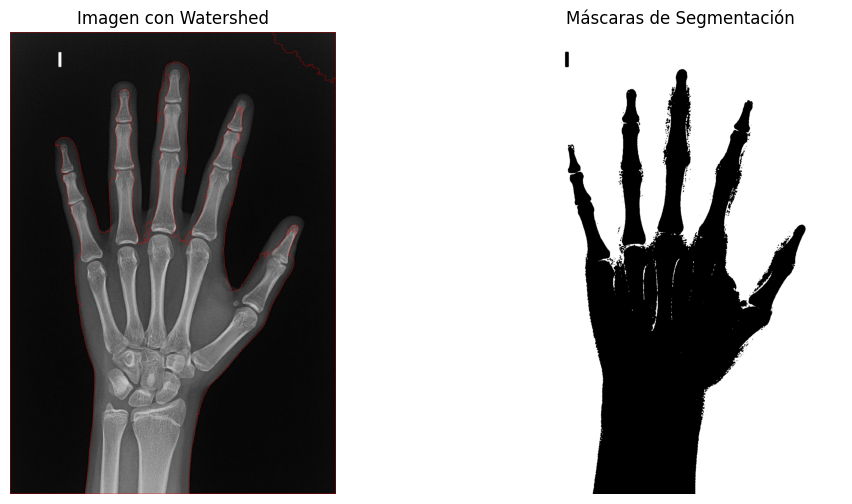

[[0 1 0 0 1 0 1 0 1 0]
 [1 1 0 0 0 1 0 1 1 1]
 [1 1 0 0 1 0 1 1 0 1]
 [1 0 0 1 1 1 1 0 0 0]
 [0 1 0 1 0 0 1 0 0 0]
 [0 1 1 0 0 1 1 1 1 0]
 [0 0 1 0 0 0 0 1 0 1]
 [1 0 0 0 0 1 0 0 1 0]
 [1 1 0 0 0 0 1 0 1 1]
 [0 1 0 1 0 0 0 0 0 1]]


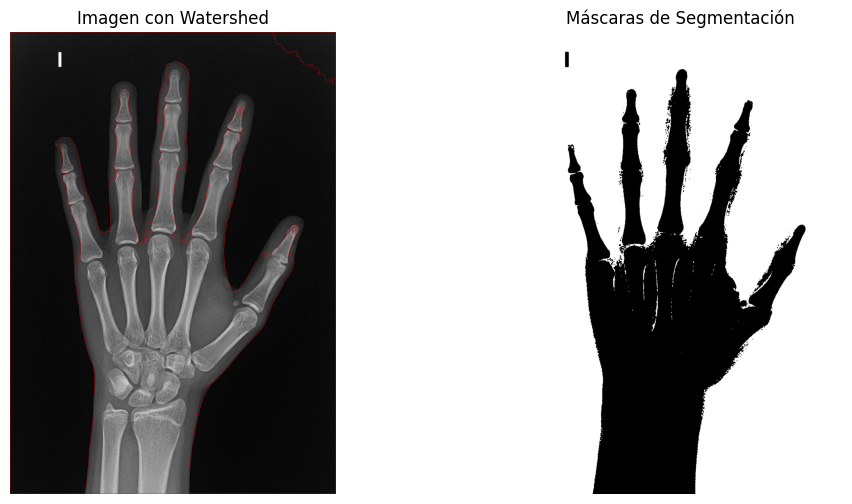

[[0 0 1 1 0 1 1 1 0 1]
 [0 1 0 0 1 1 0 0 0 0]
 [1 1 1 1 0 1 0 0 0 1]
 [1 1 1 0 0 1 0 1 1 0]
 [1 0 1 0 0 1 1 0 0 0]
 [1 0 0 0 0 1 0 1 1 1]
 [1 1 0 1 0 1 1 1 1 1]
 [0 0 1 1 0 1 1 1 0 1]
 [0 1 0 0 1 0 1 0 1 0]
 [1 0 1 1 0 0 1 0 1 1]]


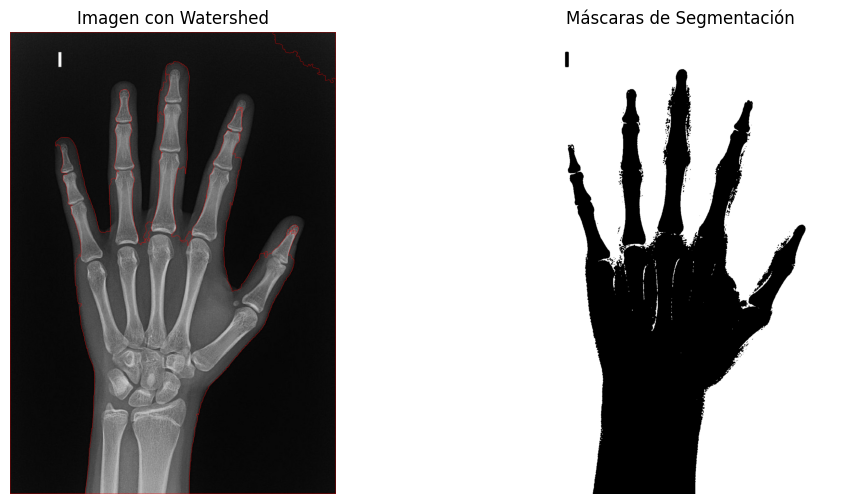

[[0 0 0 1 1 1 1 0 1 1]
 [1 0 1 1 0 1 0 1 1 1]
 [1 1 0 0 1 0 0 0 0 1]
 [0 1 0 1 1 0 0 1 1 0]
 [1 1 1 0 1 0 0 0 1 0]
 [1 1 1 1 1 0 1 0 1 1]
 [0 0 0 1 1 0 0 0 0 1]
 [0 0 0 0 1 1 0 1 1 0]
 [1 0 1 1 1 1 0 1 0 0]
 [0 1 1 0 1 1 1 0 1 0]]


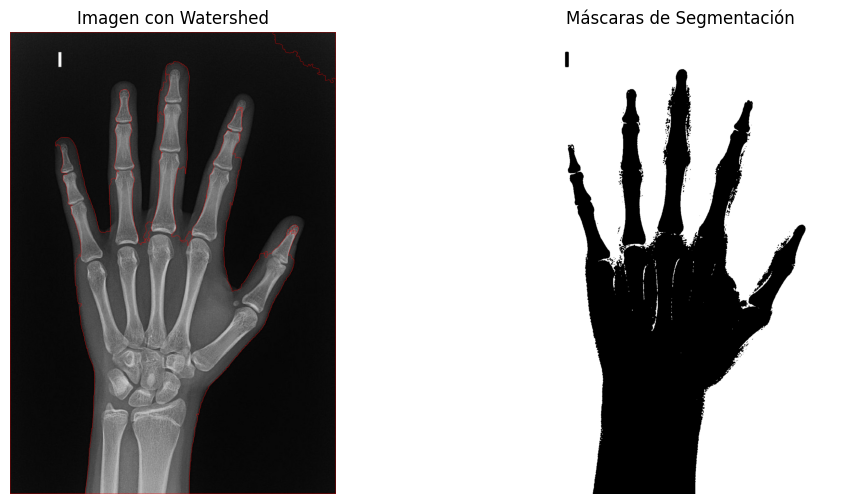

[[0 1 1 0 1 0 1 1 1 1]
 [1 0 0 0 1 1 0 1 1 1]
 [0 1 0 1 0 0 1 0 1 0]
 [1 0 1 1 1 0 0 0 0 1]
 [1 1 0 1 0 1 0 0 0 1]
 [1 0 0 0 0 1 0 1 1 0]
 [1 1 1 1 1 1 1 0 1 1]
 [0 0 1 0 0 0 1 1 1 1]
 [1 0 1 0 1 1 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0]]


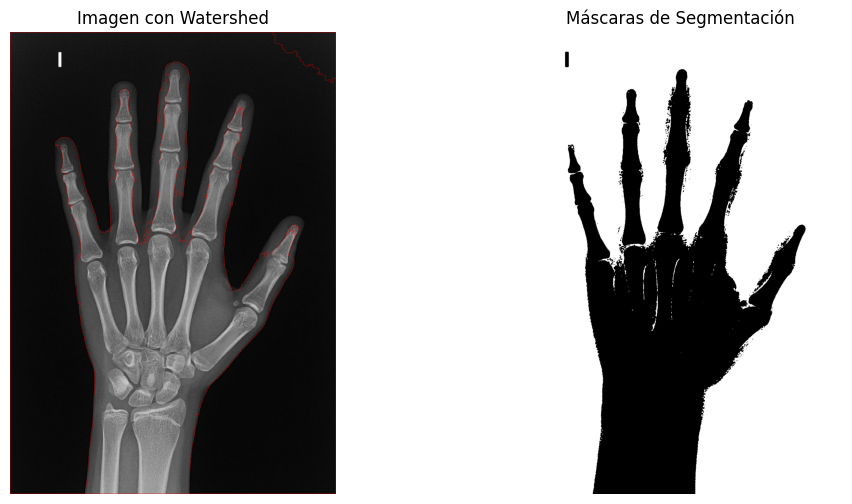

[[0 1 1 1 0 1 0 0 1 1]
 [0 0 1 0 1 0 1 0 0 0]
 [0 1 0 0 1 0 0 1 1 0]
 [1 0 1 0 1 1 1 0 0 1]
 [1 1 1 0 1 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 1 0 1 1 1 1 1 1 0]
 [0 0 0 1 1 1 0 1 0 0]
 [1 1 1 1 1 1 0 0 1 1]
 [0 1 0 1 1 1 1 0 1 0]]


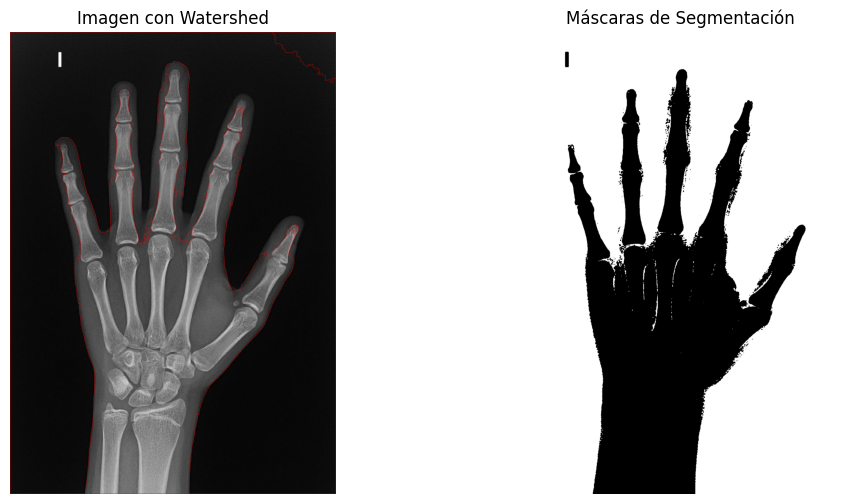

[[1 0 0 1 1 0 1 1 0 0]
 [1 0 0 0 1 0 1 0 0 1]
 [1 0 0 0 0 1 0 0 0 1]
 [0 1 0 1 1 1 1 1 0 0]
 [1 0 0 1 1 1 0 1 0 0]
 [0 1 0 1 0 0 0 0 1 0]
 [0 1 0 0 0 1 0 0 0 1]
 [1 0 0 1 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 1 1 0 1 1 0 0 0 1]]


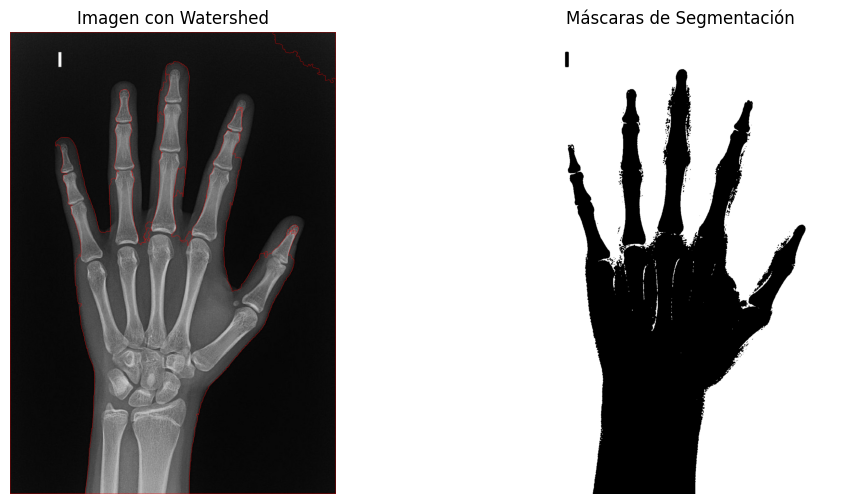

[[0 1 1 1 1 1 1 0 1 0]
 [1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 1 0 1 1]
 [1 0 0 1 1 0 1 0 1 0]
 [1 0 1 0 1 1 0 0 0 0]
 [1 1 0 0 1 1 0 1 0 0]
 [0 1 1 0 0 1 0 0 0 1]
 [1 1 0 0 1 1 0 0 1 0]
 [1 0 1 0 0 0 0 1 0 0]
 [0 1 1 1 0 1 1 1 0 1]]


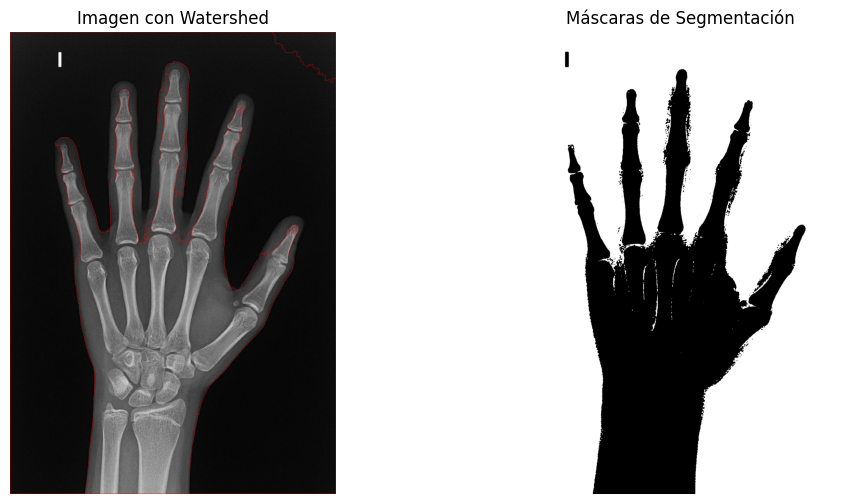

In [13]:

# Cargar la imagen
img = cv2.imread('mano.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convertir de BGR a RGB para mostrar correctamente
# Convertir la imagen a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Aplicar un filtro gaussiano para reducir el ruido
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# Umbralización para separar claramente el fondo y los objetos
ret, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
for i in range(11):
  # Realizar una apertura (erosión seguida de dilatación) para eliminar el ruido
  kernel = np.ones((3, 3), np.uint8)
  opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
  kernel2 = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]], np.uint8)
  # Crear un kernel aleatorio
  kernel_random = np.random.randint(0, 2, (10,10), dtype=np.uint8)
  print(kernel_random)
  # Dilatar para obtener el área segura del fondo
  sure_bg = cv2.dilate(opening, kernel_random, iterations=3)
  # Usar la distancia entre objetos para obtener el área segura del primer plano
  dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
  ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
  # Restar el primer plano del fondo para obtener el borde incierto
  sure_fg = np.uint8(sure_fg)
  unknown = cv2.subtract(sure_bg, sure_fg)
  # Crear marcadores para el algoritmo watershed
  ret, markers = cv2.connectedComponents(sure_fg)
  # Aumentar los marcadores en 1 para diferenciar el fondo
  markers = markers + 1
  # Marcar el área incierta con 0
  markers[unknown == 255] = 0
  # Aplicar watershed
  markers = cv2.watershed(img, markers)
  img_rgb[markers == -1] = [255, 0, 0] # Marcar los bordes con color rojo
  # Mostrar imágenes original y segmentada lado a lado
  fig, axs = plt.subplots(1, 2, figsize=(12, 6))
  axs[0].imshow(img_rgb)
  axs[0].set_title('Imagen con Watershed')
  axs[0].axis('off')
  axs[1].imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))
  axs[1].set_title('Máscaras de Segmentación')
  axs[1].axis('off')
  plt.show()